<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground-010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=716f44b674661a2f4ae0a9248bea553bdb143e93817229d0c15250d4a6e3e812
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib
[-5.  5.  0.  2. -2.]
[-6.7 10.3 -3.3  5.  -5.3]


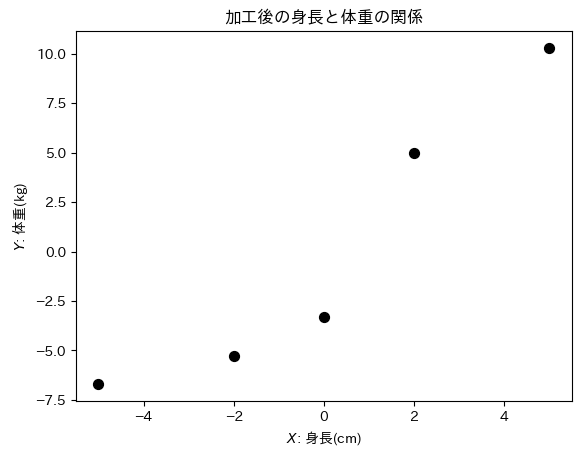

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


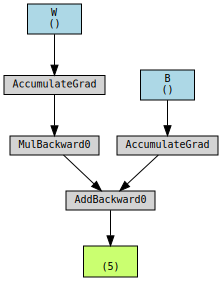

tensor(13.3520, grad_fn=<MeanBackward0>)


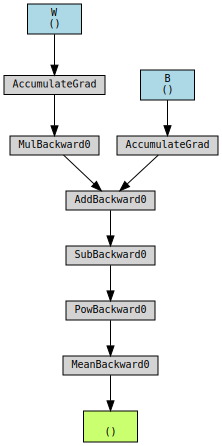

W =  1.8206898
B =  2.2734291e-06
初期状態：　損失:13.3520
最終状態：　損失:4.5390


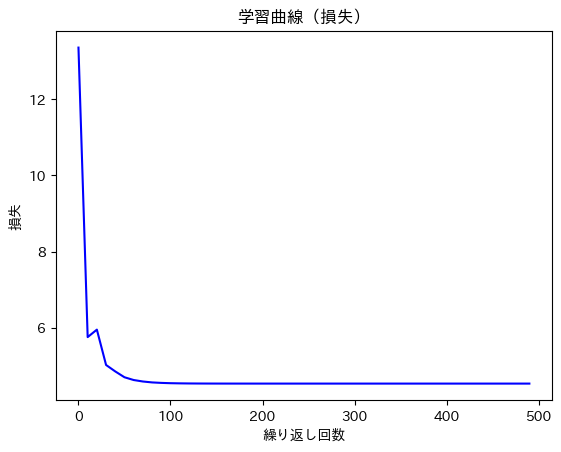

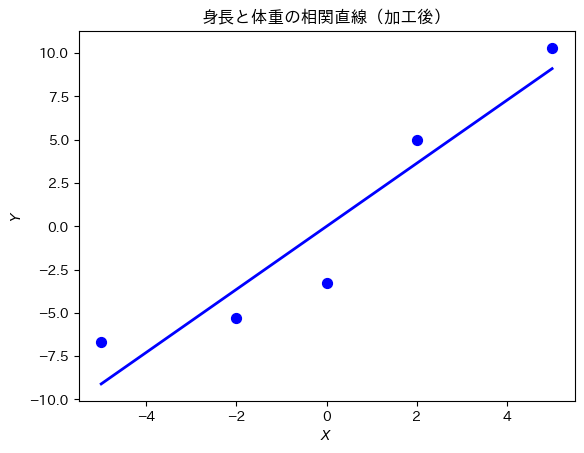

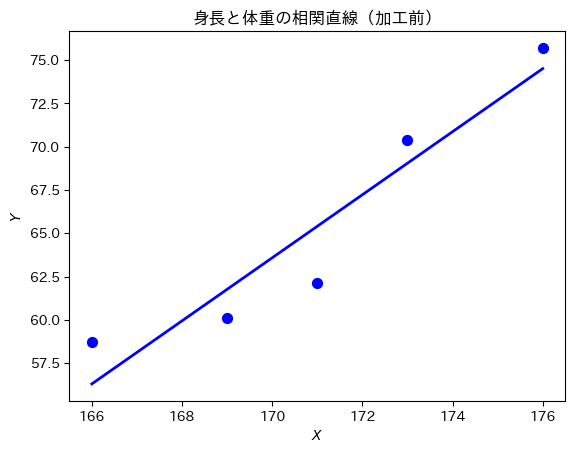

In [1]:
!pip install torchviz
!pip install japanize-matplotlib
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
japanize_matplotlib.japanize()
import torch
from torchviz import make_dot

# 入力データ準備
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])
x = sampleData1[:,0]
y = sampleData1[:,1]
X = x - x.mean()
Y = y - y.mean()
print(X)
print(Y)

# 入力データ表示
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$: 身長(cm)')
plt.ylabel('$Y$: 体重(kg)')
plt.title('加工後の身長と体重の関係')
plt.show()

# テンソルの準備
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
W = torch.tensor(1.0, requires_grad=True, dtype=torch.float32)
B = torch.tensor(1.0, requires_grad=True, dtype=torch.float32)

# 予測関数
def pred(X):
  return W * X + B

Yp = pred(X)
print(Yp)

# 予測値の計算グラフ表示
params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

# 損失関数
def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

loss = mse(Yp, Y)
print(loss)

# 損失の計算グラフ表示
params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

# 繰り返し回数
num_epochs = 500
# 学習率
lr = 0.001
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# 記録用配列初期化
history = np.zeros((0, 2))

# ループ処理
for epoch in range(num_epochs):
  # 予測計算
  Yp = pred(X)

  # 損失計算
  loss = mse(Yp, Y)

  # 勾配計算
  loss.backward()

  # パラメータ調整
  optimizer.step()
  optimizer.zero_grad()

  # 損失の記録
  if (epoch % 10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    # print(f'epoch = {epoch} loss = {loss:.4f}')

# パラメータの最終値
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())
print(f'初期状態：　損失:{history[ 0, 1]:.4f}')
print(f'最終状態：　損失:{history[-1, 1]:.4f}')

# 学習曲線の表示（損失）
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.show()

# グラフ描画
X_range = torch.tensor(np.arange(-5, 5.1, 0.25)).float()
Y_range = pred(X_range)

plt.scatter(X, Y, c='b', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線（加工後）')
plt.show()

# グラフ描画

plt.scatter(X + x.mean(), Y + y.mean(), c='b', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot((X_range + x.mean()).data, (Y_range + y.mean()).data, lw=2, c='b')
plt.title('身長と体重の相関直線（加工前）')
plt.show()
